In [1]:
!git clone https://github.com/suhas2071/datafiles.git

Cloning into 'datafiles'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 65 (delta 1), reused 0 (delta 0), pack-reused 59
Unpacking objects: 100% (65/65), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
diabetes = pd.read_csv('/content/datafiles/diabetes.csv')
print(diabetes.columns)
diabetes.shape

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


(768, 9)

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [4]:
df=diabetes.loc[:, diabetes.columns != 'Outcome']

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,74,23,112,26.2,0.245,30
766,1,126,0,0,0,30.1,0.349,47


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.shape
#Feature Columns

(768, 9)

In [7]:
diabetes[['Glucose','Outcome']].corr()

,Glucose,Outcome
Glucose,1.000000,0.465754
Outcome,0.465754,1.000000


In [8]:
diabetes[['Insulin','Outcome']].corr()

,Insulin,Outcome
Insulin,1.000000,0.130548
Outcome,0.130548,1.000000


In [9]:
diabetes[['BMI','Outcome']].corr()

,BMI,Outcome
BMI,1.000000,0.292695
Outcome,0.292695,1.000000


In [10]:
diabetes[['BloodPressure','Outcome']].corr()

,BloodPressure,Outcome
BloodPressure,1.000000,0.058972
Outcome,0.058972,1.000000


In [11]:
diabetes[['DiabetesPedigreeFunction','Outcome']].corr()

,DiabetesPedigreeFunction,Outcome
DiabetesPedigreeFunction,1.000000,0.173844
Outcome,0.173844,1.000000


In [12]:
diabetes[['SkinThickness','Outcome']].corr()

,SkinThickness,Outcome
SkinThickness,1.000000,0.074752
Outcome,0.074752,1.000000


In [13]:
diabetes[['Pregnancies','Outcome']].corr()

,Pregnancies,Outcome
Pregnancies,1.000000,0.221898
Outcome,0.221898,1.000000


In [ ]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


In [14]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [16]:
diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


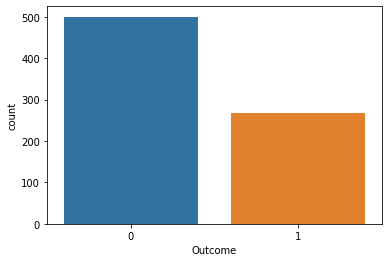

In [15]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

In [17]:
#!pip install sklearn

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], 

                                                    #stratify=diabetes['Outcome'], random_state=66)
#80%,20%
#768
#550
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'],stratify=diabetes['Outcome'])
500
268

500*0.80
268*0.80


#80%,20%
#test_size=0.2

from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for var in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=var)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
print(training_accuracy)
print(test_accuracy)

[1.0, 0.8420138888888888, 0.8611111111111112, 0.78125, 0.7881944444444444, 0.7621527777777778, 0.7743055555555556, 0.78125, 0.78125, 0.7708333333333334]
[0.6614583333333334, 0.71875, 0.671875, 0.71875, 0.7239583333333334, 0.7447916666666666, 0.7239583333333334, 0.7447916666666666, 0.734375, 0.734375]


In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], 

                                                    #stratify=diabetes['Outcome'], random_state=66)
#80%,20%
#768
#550
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'],test_size=0.2,stratify=diabetes['Outcome'])
#80%,20%
#test_size=0.2

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
360,5,189,64,33,325,31.2,0.583,29
263,3,142,80,15,0,32.4,0.200,63
98,6,93,50,30,64,28.7,0.356,23
18,1,103,30,38,83,43.3,0.183,33
31,3,158,76,36,245,31.6,0.851,28
...,...,...,...,...,...,...,...,...
513,2,91,62,0,0,27.3,0.525,22
676,9,156,86,0,0,24.8,0.230,53
13,1,189,60,23,846,30.1,0.398,59
117,5,78,48,0,0,33.7,0.654,25


In [ ]:
y_test

360    1
263    0
98     0
18     0
31     1
      ..
513    0
676    1
13     1
117    0
429    1
Name: Outcome, Length: 154, dtype: int64

In [ ]:
y_train

550    0
105    0
0      1
488    0
52     0
      ..
343    0
590    1
323    1
419    1
468    1
Name: Outcome, Length: 576, dtype: int64

In [ ]:
y_train.shape

(576,)

In [ ]:
X_test.shape

(192, 8)

In [ ]:
y_test.shape

(192,)

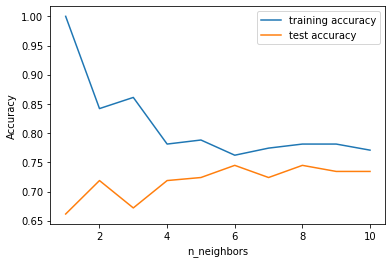

In [18]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.72


In [ ]:
Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age

In [20]:
sample = [[0,90,88,44,0,43.3,0.222,26],[0,181,88,44,510,43.3,0.222,26]]
preds = knn.predict(sample)
print("Predictions:", preds)

Predictions: [0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
sample = [[0,181,88,44,510,43.3,0.222,26]]
preds = knn.predict(sample)
print("Predictions:", preds)

Predictions: [1]


In [21]:
# making predictions on the testing set
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
print(y_pred)
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

[0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0
 1 1 0 0 0 0 0]
kNN model accuracy: 0.7239583333333334
[[98 27]
 [26 41]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       125
           1       0.60      0.61      0.61        67

    accuracy                           0.72       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.72      0.72      0.72       192



In [ ]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [24]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
print("True Positives: ",tp)
print("False Positives: ",fp)
#https://www.geeksforgeeks.org/numpy-ravel-python/

True Positives:  98
False Positives:  27


In [25]:
print("False Negative: ",fn)
print("True Negative: ",tn)


False Negative:  26
True Negative:  41


In [26]:
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

Accuracy 72.40%:


In [28]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#ideally fp should be Zero

Precision 0.78


In [27]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

Recall 0.79


In [29]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.79


# http://benalexkeen.com/feature-scaling-with-scikit-learn/

# http://benalexkeen.com/scoring-classifier-models-using-scikit-learn/